In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = ax.text(0.5, 0.5, 'Text')

fonts = ['xx-small', 'x-small', 'small', 'medium', 'large', 
         'x-large', 'xx-large', 'larger', 'smaller']

for font in fonts:
    t.set_fontsize(font)
    print (font, round(t.get_fontsize(), 2))

plt.close()    

xx-small 5.79
x-small 6.94
small 8.33
medium 10.0
large 12.0
x-large 14.4
xx-large 17.28
larger 12.0
smaller 8.33


In [1]:
import Corrfunc
import asdf
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
fn = '/mnt/home/lgarrison/ceph/multicosmo-viz/traj.asdf'
af = asdf.open(fn)
pairs = af['pairs']

In [15]:
xi_smooth = 3
nbin = pairs['npair'].shape[0] // xi_smooth
smoothpairs = Table({}, meta=pairs.meta.copy())
DD = pairs['npair'].reshape(nbin, xi_smooth, -1).sum(axis=1)
RR = pairs['RR'].reshape(nbin, xi_smooth, -1).sum(axis=1)
rmin = pairs['rmin'][::xi_smooth]
rmax = pairs['rmax'][xi_smooth-1::xi_smooth]  # ?
smoothpairs['xi'] = DD/RR - 1  # shape (nbin, nstate)
smoothpairs['rmid'] = (rmax + rmin) / 2
print((smoothpairs['xi'].T*smoothpairs['rmid']**1.5).max())

20.406484819857575


(0.1, 12.636779730700646)

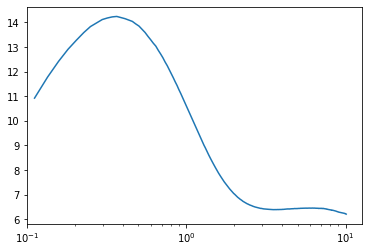

In [31]:
fig, ax = plt.subplots()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(smoothpairs['rmid'], smoothpairs['xi'][:,0]*smoothpairs['rmid']**1.5)
ax.set_xlim(0.1)
#ax.loglog(smoothpairs['rmid'], smoothpairs['xi'][:,0])

In [43]:
p = traj['pos'][:,5,:].T
#bins = np.logspace(-1,1,2*3*2*3+1)
bins = np.linspace(0.1, 12.1, 2**3*3**3 + 1)
res = Corrfunc.theory.DD(1, 12, bins, *p, periodic=False)
box = 30.

res = Table(res)
res['rmid'] = (res['rmin'] + res['rmax'])/2.

rng = np.random.default_rng()
rands = rng.uniform(0, box, size=(3,10**5))
rand_res = Corrfunc.theory.DD(1, 12, bins, *rands, periodic=False, verbose=True)

#res['RR'] = (res['rmax']**3 - res['rmin']**3)*4/3*np.pi*len(p.T)*(len(p.T)-1)/30**3
res['RR'] = rand_res['npairs'] * (rands.shape[1]/p.shape[1])**-2
res['xi'] = res['npairs']/res['RR'] - 1.

In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 4,4,2.  Time taken =   0.004 sec
countpairs_double> gridlink seems inefficient. nmesh = (4, 4, 2); avg_np = 3.12e+03. Boosting bin refine factor - should lead to better performance
xmin = 0.000583 xmax=29.999111 rpmax = 12.100000
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 7,7,2.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%........100% done. Time taken =  2.955 secs
